<a href="https://colab.research.google.com/github/AarohSinha100/MACHINE_LEARNING/blob/main/01_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - LINEAR REGRESSION WITH PYTHON
Linear Regression is a Supervised Learning Algorithm that is used to predict the output using labelled data. It assumes a ilnear relation between the dependent and the independent variable.

* A linear regression model tries to find the slope of the line of best fit that shows a linear relationship between the variables.
* The Goal of Lienar regression is to find the best fit line and reduce the cost function.

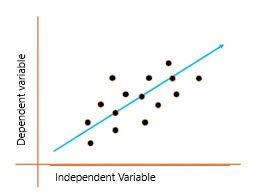

> **COST FUNCTION** --> In a linear regression problem, there will me multiple lines and slope. To find the best fit line, certain factors are used.
* we can use the Mean Squared Error or MSE as the parameter. For linear regression, this MSE is nothing but the Cost Function. ***(Mean Squared Error is the sum of the squared differences between the prediction and true value.)***

--------------------------------------------------------------------------------

 > **GRADIENT DESCENT** --> Gradient Descent is one of the optimization algorithms that optimize the cost function(objective function) to reach the optimal minimal solution. To find the optimum solution we need to reduce the cost function(MSE) for all data points
 * This is done by updating the slope, the x and y intercepts (means the predicted values of each true value) multiple times to get the best outcome.
--------------------------------------------------------------------------------

## TEST CASE -->
We are given a house dataset. We have to create a linear regression model that predicts the house prices.

> **TARGETS -->**
* DATA CLEANING
* OPTIMAL LINEAR REGRESSION HYPERPARAMETER TUNING
* PIPELINES
* EVALUATION METRICS OF L.R



In [ ]:
import datetime
print(f"This notebook was last run on {datetime.datetime.now()}")

This notebook was last run on 2023-08-01 15:42:15.844870


In [ ]:
from google.colab import files

file = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
# Reading in the csv file we imported
import pandas as pd
import io

housing_df = pd.read_csv(io.BytesIO(file["Housing.csv"]))
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### DATA ANALYSIS AND VISUALIZATION

In [ ]:
housing = housing_df.copy() # Making a copy of our original dataframe

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Encoding the binary object_values to int

# EXPERIMENTS
We are gonna perform several experiments -
1. Data catregorically encoded
2. Data One Hot Encoded
3. Using A Pipeline

In [ ]:
print(housing_df["basement"].dtypes == "object")

True


# EXPERIMENT 1 ---> CATRGORICAL NUMERIC ENCODING
* We will have to scale the area and price and normalize them. If we leave them like they are eg - 10000 and the other values are in range around 0-1, we are gonna get weird results such as mse over 10000!

In [ ]:
# housing_df["basement"] = housing_df["basement"].astype("category")
# housing_df["basement_encoded"] = housing_df["basement"].cat.codes
for i in housing_df.columns:
  try:
    if housing_df[i].dtypes=="object":
      housing_df[i] = housing_df[i].astype("category")
      housing_df[i] = housing_df[i].cat.codes
  except Exception as e:
    print(e)


housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
housing_df["area"].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [ ]:
housing_df["area"]

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
price_data = housing_df["price"].values.reshape(-1,1)

minmax = MinMaxScaler()
minmax.fit(price_data)

trans = minmax.transform(price_data)
trans = pd.DataFrame(trans, columns=["price"])

housing_df["price"] = trans
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
area_data = housing_df["area"].values.reshape(-1, 1)

minmax = MinMaxScaler()
minmax.fit(area_data)

trans = minmax.transform(area_data)
trans = pd.DataFrame(trans, columns=["area"])
trans

,area
0,0.396564
1,0.502405
2,0.571134
3,0.402062
4,0.396564
...,...
540,0.092784
541,0.051546
542,0.135395
543,0.086598


In [ ]:
housing_df["area"] = trans
housing_df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,0


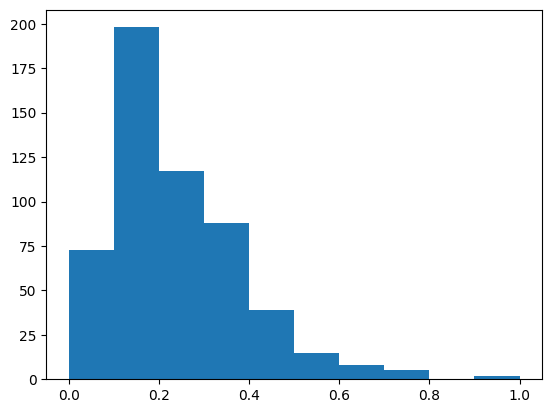

In [ ]:
import matplotlib.pyplot as plt
plt.hist(housing_df["area"])
plt.show()

<Axes: >

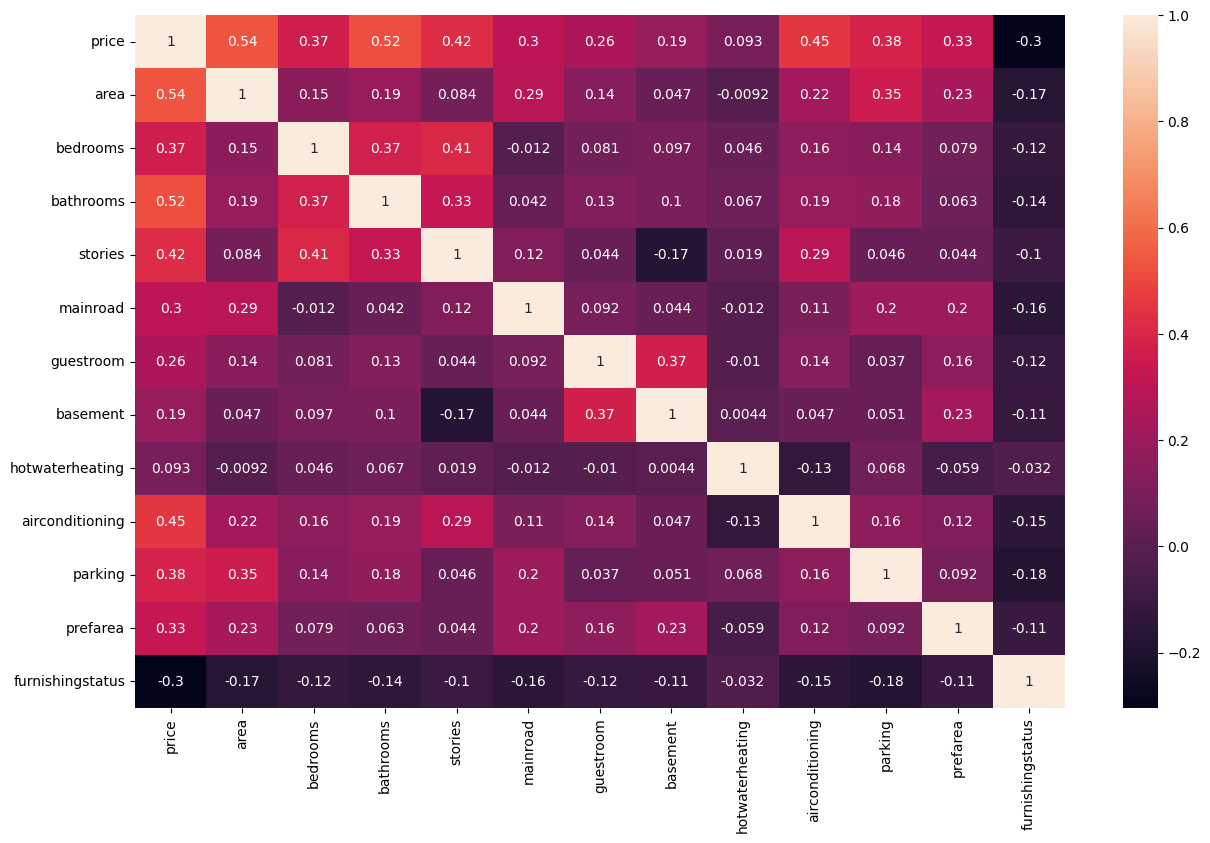

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(housing_df.corr(), annot=True)

## Making Our First Linear Regression Model (CATROGORICAL ENCODING)

##### 1. Making the train and test splits

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = housing_df.drop("price", axis=1)
y = pd.DataFrame(housing_df["price"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Reset the index of y_train to be consecutive integers (optional)
y_train = y_train.reset_index(drop=True)
print("Number of samples in X_train:", len(X_train))
print("Number of samples in X_test:", len(X_test))
print("Number of target values in y_train:", len(y_train))
print("Number of target values in y_test:", len(y_test))

Number of samples in X_train: 381
Number of samples in X_test: 164
Number of target values in y_train: 381
Number of target values in y_test: 164


In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,0.396564,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
y

,price
0,1.000000
1,0.909091
2,0.909091
3,0.906061
4,0.836364
...,...
540,0.006061
541,0.001485
542,0.000000
543,0.000000


In [ ]:
y_train.head()

,price
0,0.445455
1,0.272727
2,0.229697
3,0.145455
4,0.133333


##### 2. Making the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_categorical = LinearRegression()
lr_categorical.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_preds = lr_categorical.predict(X_test)
print(y_preds)

[[0.08253505]
 [0.48270299]
 [0.29627264]
 [0.505075  ]
 [0.29568396]
 [0.32301392]
 [0.47157402]
 [0.17534278]
 [0.15787671]
 [0.45721607]
 [0.31577954]
 [0.28424968]
 [0.11767459]
 [0.20080738]
 [0.19138903]
 [0.19280709]
 [0.39480888]
 [0.0905264 ]
 [0.4103728 ]
 [0.09827795]
 [0.64353155]
 [0.35944361]
 [0.16428848]
 [0.22150184]
 [0.29151686]
 [0.43319474]
 [0.18796612]
 [0.21059452]
 [0.21452473]
 [0.26964054]
 [0.10130869]
 [0.51921536]
 [0.46843165]
 [0.13303467]
 [0.07927288]
 [0.18243873]
 [0.44349903]
 [0.11199648]
 [0.29514503]
 [0.34677885]
 [0.27087597]
 [0.28682933]
 [0.42083468]
 [0.07619317]
 [0.39441995]
 [0.35963397]
 [0.24448007]
 [0.25128158]
 [0.13283267]
 [0.53835416]
 [0.3259044 ]
 [0.27097335]
 [0.08678006]
 [0.07922383]
 [0.47007472]
 [0.43363831]
 [0.19752503]
 [0.11432667]
 [0.3798999 ]
 [0.38812132]
 [0.12607686]
 [0.23183525]
 [0.44469017]
 [0.42932015]
 [0.31239475]
 [0.03771061]
 [0.02541244]
 [0.51305545]
 [0.17829667]
 [0.16373372]
 [0.1212905 ]
 [0.16

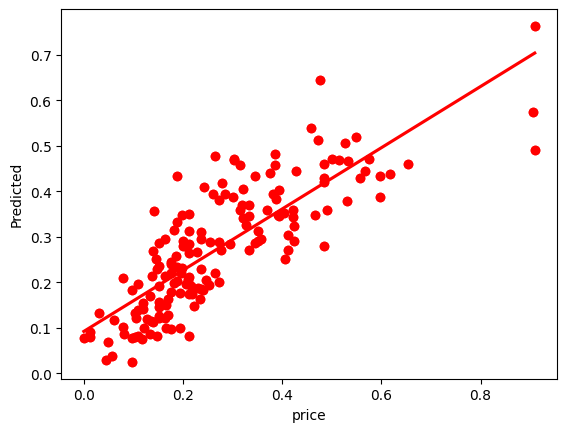

In [ ]:
# Visualizing the results
import numpy as np
plt.scatter(y_test,y_preds, color="red");
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_test,y=y_preds,ci=None,color ='red');
# plt.scatter(X_test, np.expand_dims(y_test, axis=1), color='red')
# plt.plot(X_test, y_preds, color="black")
# plt.shoW()

##### 4. Evaluating the model

### EVALUATION METRICS --->
##### **MSE (MEAN SQUARED ERROR) -->**
* mean squared error measures how close the predicted point is closer to the real point.
* A larger MSE indicates that the data points are dispersed widely around its central moment (mean), whereas a smaller MSE suggests the opposite.
*MSE = (1/n) * Σ(actual – forecast)^2


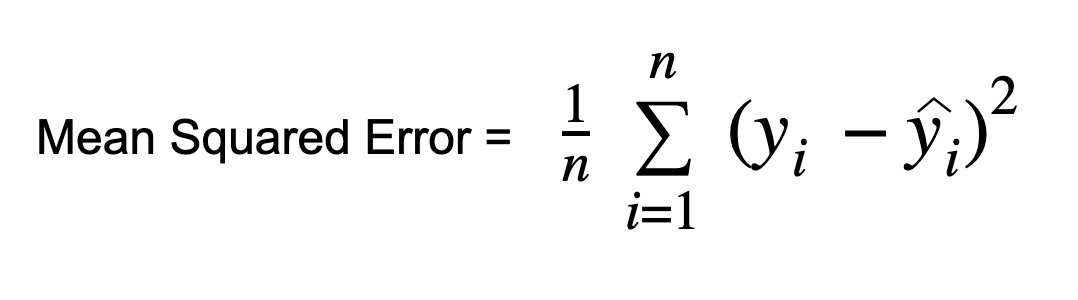


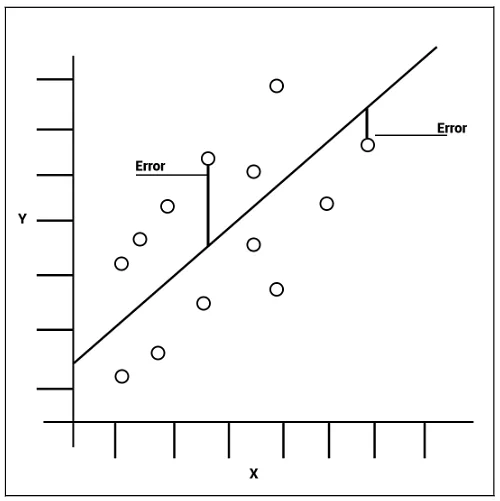

##### **MAE (MEAN ABSOLUTE ERROR) -->**
*  It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors.
* The lower the mae, the higher the accuracy of the model.
* All the errors are weighted on the same scale since absolute values are taken.
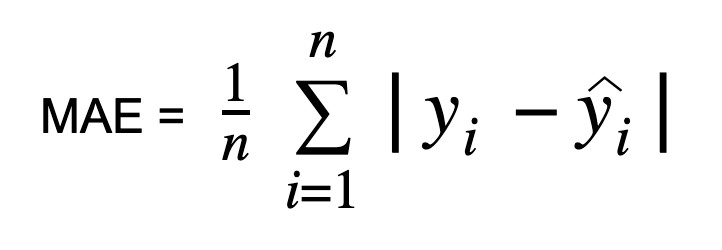


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse_categorical = mean_squared_error(y_test, y_preds)
mae_categorical = mean_absolute_error(y_test, y_preds)
rmse_categorical = sqrt(mse_categorical)
print(f"mse ---> {mse_categorical}")
print(f"mae ---> {mae_categorical}")
print(f"rmse ---> {rmse_categorical}")

mse ---> 0.00930667659229928
mae ---> 0.07309108003894817
rmse ---> 0.09647111791774407


In [ ]:
score_categorical = lr_categorical.score(X_test, y_test)
score_categorical

0.667025547883914

In [ ]:
results = {"categorical_model": {
    "mse":mse_categorical,
    "mae":mae_categorical,
    "rmse":rmse_categorical,
    "score":score_categorical
} }

#### **ONE-HOT ENCODING**
* various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. For example, suppose a dataset has a Gender column with categorical elements like Male and  Female
* various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. For example, suppose a dataset has a Gender column with categorical elements like Male and  Female
* In One Hot Encoding, the categorical parameters will prepare separate columns for all classes.

> ***ADVANTAGES -***
1. It allows the use of categorical variables in models that require numerical input.
2. It can improve model performance by providing more information to the model about the categorical variable.
3. It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

In [ ]:
### Now working on copy we created of housing -->
housing_copy2 = housing.copy() # Also creating another copy for the pipeline experiment
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

cols_trans = []

for i in housing.columns:
  if housing[i].dtypes == "object":
    cols_trans.append(i)

one_hot_encoder.fit(housing[cols_trans])
trans = one_hot_encoder.transform(housing[cols_trans])

feature_names = one_hot_encoder.get_feature_names_out(input_features=cols_trans)

trans = pd.DataFrame(trans.toarray(), columns=feature_names)
trans

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
housing = housing_copy2.copy()

In [ ]:
# mergeing with the integer columns
main_1 = pd.DataFrame(housing[housing.select_dtypes(include=["int"]).columns.tolist()])

main_1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
housing_encoded = pd.concat([main_1, trans], axis=1)
housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

values_to_scale = housing_encoded["price"].values.reshape(-1,1)
minmax.fit(values_to_scale)

trans_price = minmax.transform(values_to_scale)
trans_price = pd.DataFrame(trans_price, columns=["price"])

housing_encoded["price"] = trans_price

In [ ]:
housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.909091,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.909091,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.906061,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.836364,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
minmax = MinMaxScaler()

values_to_scale = housing_encoded["area"].values.reshape(-1,1)

minmax.fit(values_to_scale)
trans_area = minmax.transform(values_to_scale)
trans_area = pd.DataFrame(trans_area, columns=["area"])
housing_encoded["area"] = trans_area

housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.909091,0.502405,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.909091,0.571134,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.906061,0.402062,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.836364,0.396564,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


##### 1.Train Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = housing_df.drop("price", axis=1)
y = pd.DataFrame(housing_df["price"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Reset the index of y_train to be consecutive integers (optional)
y_train = y_train.reset_index(drop=True)
print("Number of samples in X_train:", len(X_train))
print("Number of samples in X_test:", len(X_test))
print("Number of target values in y_train:", len(y_train))
print("Number of target values in y_test:", len(y_test))

Number of samples in X_train: 381
Number of samples in X_test: 164
Number of target values in y_train: 381
Number of target values in y_test: 164


In [ ]:
from sklearn.linear_model import LinearRegression

lr_encoded = LinearRegression()
lr_encoded.fit(X_train, y_train)

lr_preds = lr_encoded.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse_encoded = mean_squared_error(y_test, lr_preds)
mae_encoded = mean_absolute_error(y_test, lr_preds)
rmse_encoded = sqrt(mse_encoded)
print(f"mse ---> {mse_encoded}")
print(f"mae ---> {mae_encoded}")
print(f"rmse ---> {rmse_encoded}")

mse ---> 0.00782563506640091
mae ---> 0.06813992755107184
rmse ---> 0.08846261959947213


In [ ]:
score_encoded = lr_encoded.score(X_test, y_test)
score_encoded

0.6666222290310777

In [ ]:
results = {"categorical_model": {
    "mse":mse_categorical,
    "mae":mae_categorical,
    "rmse":rmse_categorical,
    "score":score_categorical
} ,
    "encoded_model": {
    "mse":mse_encoded,
    "mae":mae_encoded,
    "rmse":rmse_encoded,
    "score":score_encoded
}
           }

results

{'categorical_model': {'mse': 0.00930667659229928,
  'mae': 0.07309108003894817,
  'rmse': 0.09647111791774407,
  'score': 0.667025547883914},
 'encoded_model': {'mse': 0.00782563506640091,
  'mae': 0.06813992755107184,
  'rmse': 0.08846261959947213,
  'score': 0.6666222290310777}}

### Running for diffrent random state to get best score

In [ ]:
scores = []

for i in range(0,300):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  lr_encoded = LinearRegression()
  lr_encoded.fit(X_train, y_train)

  lr_preds = lr_encoded.predict(X_test)
  scores.append(lr_preds)

In [ ]:
scores

[array([[0.19350366],
        [0.38914699],
        [0.23195593],
        [0.48287112],
        [0.09824347],
        [0.4528936 ],
        [0.13352152],
        [0.12194353],
        [0.15554267],
        [0.56465943],
        [0.42148865],
        [0.17330832],
        [0.1735009 ],
        [0.24535525],
        [0.19190204],
        [0.02383558],
        [0.19305497],
        [0.16154235],
        [0.12553631],
        [0.25336962],
        [0.35275557],
        [0.4041298 ],
        [0.25344915],
        [0.08474866],
        [0.31410361],
        [0.34262313],
        [0.31276341],
        [0.31933857],
        [0.33487216],
        [0.35919792],
        [0.13428327],
        [0.39921467],
        [0.46878373],
        [0.10659397],
        [0.23390259],
        [0.29456991],
        [0.27879836],
        [0.1645808 ],
        [0.10272582],
        [0.19524354],
        [0.54219853],
        [0.2792557 ],
        [0.40549159],
        [0.16141173],
        [0.18673636],
        [0